### Large weights in Linear Regression

Inspired by UW course

$y = \sin(4x)$:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

Create random values for x in interval [0,1)

In [2]:
np.random.seed(0)
n = 30
x = np.random.randn(n)
x = x/x.max()
x.sort()
x

array([-1.1247867 , -0.64075899, -0.43056543, -0.37629431, -0.32698029,
       -0.09038786, -0.08246876, -0.06668439, -0.04547578,  0.02016012,
        0.05360712,  0.06346218,  0.1379302 ,  0.14700899,  0.17629977,
        0.18089995,  0.1955556 ,  0.28796884,  0.33529515,  0.38085007,
        0.4185864 ,  0.43120872,  0.64071838,  0.64736459,  0.65825577,
        0.67530613,  0.77719958,  0.82280171,  0.98728434,  1.        ])

Compute y

In [3]:
y =np.sin(4*x)

Add random Gaussian noise to y

In [4]:
np.random.seed(0)
e = np.random.randn(n)/5
y = y + e

### Put data into an SFrame to manipulate later

In [5]:
data = pd.DataFrame({'X1':x,'Y':y})
data

,X1,Y
0,-1.124787,1.330160
1,-0.640759,-0.466785
2,-0.430565,-0.792803
3,-0.376294,-0.549669
4,-0.326980,-0.592135
5,-0.090388,-0.549181
6,-0.082469,-0.133907
7,-0.066684,-0.293857
8,-0.045476,-0.201545
9,0.020160,0.162673


### Create a function to plot the data, since we'll do it many times

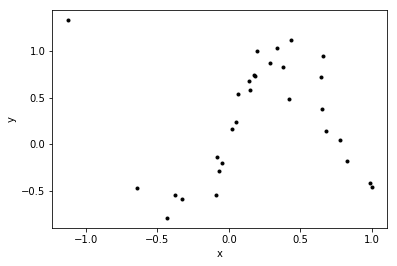

In [6]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

## Define some useful polynomial regression functions

           100             99             98             97
1.139e+05 x   - 3.913e+04 x  + 1.541e+05 x  - 3.606e+04 x 
              96             95             94        93            92
 + 2.111e+05 x  - 2.847e+04 x  + 2.913e+05 x  - 5618 x  + 4.05e+05 x 
              91             90             89             88
 + 3.774e+04 x  + 5.678e+05 x  + 1.155e+05 x  + 8.012e+05 x 
              87             86             85             84
 + 2.475e+05 x  + 1.137e+06 x  + 4.638e+05 x  + 1.622e+06 x 
              83            82             81             80
 + 8.086e+05 x  + 2.32e+06 x  + 1.347e+06 x  + 3.325e+06 x 
              79             78             77             76
 + 2.171e+06 x  + 4.765e+06 x  + 3.411e+06 x  + 6.815e+06 x 
              75             74             73             72
 + 5.242e+06 x  + 9.708e+06 x  + 7.897e+06 x  + 1.374e+07 x 
              71             70             69             68
 + 1.166e+07 x  + 1.927e+07 x  + 1.686e+07 x  + 2.669e+07 x 
    

/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


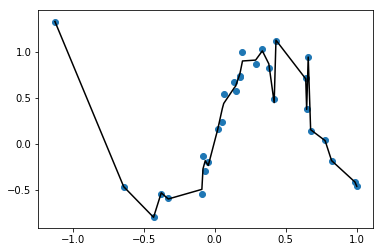

In [7]:
plt.scatter(x, y)
f = np.poly1d(np.polyfit(x, y, 100))
print(f)
plt.plot(x, f(x), 'k')